<a href="https://colab.research.google.com/github/Parth-G27/Pytorch-work/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch WorkFlow 
#### 1. Get Data ready
#### 2. Build or Pick pretrained model -> Pick loss function & optimizer -> Build a training loop -> 
#### 3. Fit the model to the data (Training) and make predictions
#### 4. Evaluate the model
#### 5. Improve through experimentation 
#### 6. Save and relode the trained model

In [1]:
import torch
from torch import nn

### Machine Learning 2 Parts
#### 1. Get Data into numerical representation
#### 2. Build a model  to learn patterns in that nemerical respresentation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Using linear regression formula to  make a straight line with known parameters.

In [3]:
# Our known parameters are weight & bias
weight = 0.5
bias = 0.2

# create data
start = 0
end = 1
X = torch.arange(start,end,0.02).unsqueeze(dim=1)
Y = weight*X + bias
X[:5],X.ndim,Y[:5],Y.ndim

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 2,
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400]]),
 2)

#### Creating Training and Test Sets by splitting the data into the two 
##### Training 80% Test 20%

In [4]:
train_split = int(0.8*len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]
len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

In [5]:
def plot_predictions(
        train_data = X_train,
        train_labels = Y_train,
        test_data = X_test,
        test_labels = Y_test,
        predictions=None):
    
    plt.scatter(train_data,train_labels, c="b", s=5, label="Training Data")
    plt.scatter(test_data,test_labels,c="g",s=5,label="Test Data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=5,label="Predictions")

    plt.legend()
    

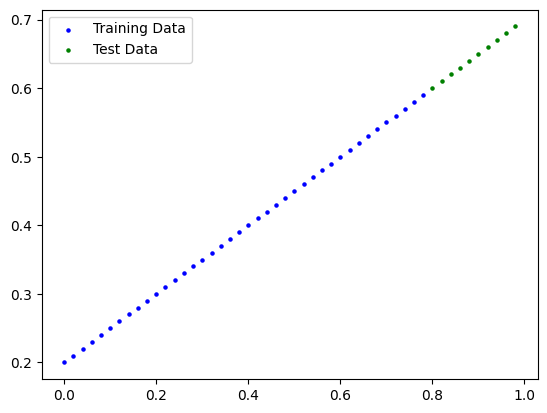

In [6]:
plot_predictions()

#### Building the Model
Learn the patterns in training data and oredict the test data 

What does the model do ?
- Start with random values of weights and bias
- Look at the training data  and adjust the random values to better represent the ideal values 

How does it do ? Two algorithms
1. gradiant descent
2. backproagation

In [7]:
# nn is the building layer for neural network
# Our class of model subclasses nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
        # Forward method defines the computation in the model 
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights * x +self.bias

In [8]:
torch.manual_seed(9)
model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.6558], requires_grad=True),
 Parameter containing:
 tensor([0.3020], requires_grad=True)]

In [9]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6558])), ('bias', tensor([0.3020]))])

In [10]:
with torch.inference_mode():
    y_preds = model0(X_test)

y_preds

tensor([[0.8267],
        [0.8398],
        [0.8529],
        [0.8660],
        [0.8791],
        [0.8922],
        [0.9053],
        [0.9185],
        [0.9316],
        [0.9447]])

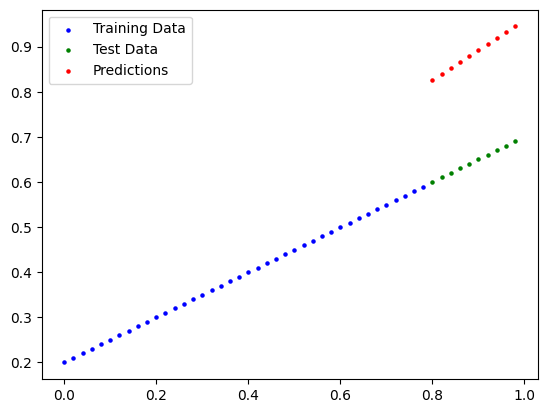

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
# Loss function setup 
loss_fn = nn.L1Loss()

# Optimizer setup
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01) 

(lr) Learning rate : most important hyperparameter we can set .

more the lr more rapidly the parameters get changed, less the value of lr less rapidly the value of parameters chnage

hyperparameter : is a parameter that we as a programmer can set ourselves, whereas parameter is the value that model sets itself

In [13]:
# Training loop & Testing loop 

# An Epoch is one loop through teh data 
epochs = 10
for epoch in range(epochs):
    # set the model to training mode
    model0.train() # Put model in training mode (this is the default state of a model)
    # training mode sets all parameters that req. gradients to req. gradients

    # Forward pass 
    y_pred = model0(X_train)
    # Calculat loss 
    loss = loss_fn(y_pred, Y_train)
    # Optimizer zero grad
    optimizer.zero_grad()
    # Performs backpropagation on the loss with respect to the parameters of the model 
    loss.backward()

    # step the optimizer (perform gradient descent)
    optimizer.step()

    
    model0.eval() # Turns off gradiant tracking 